- a zero-inflated model is a statistical model based on a distribution that allows for frequent zero-valued observations
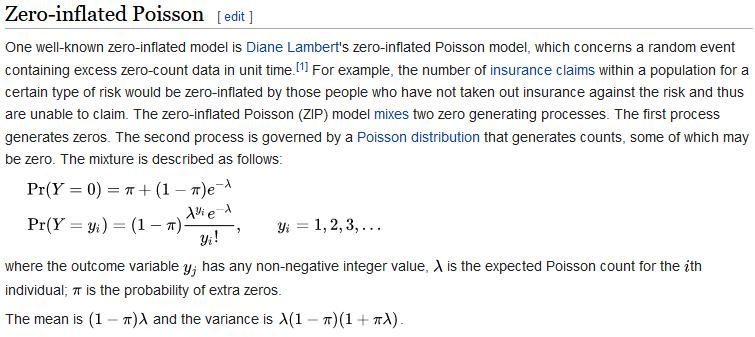
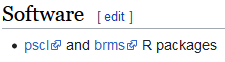

In [6]:
library(readxl)
library(MASS)
library(pscl)
library(boot)

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis



In [7]:
library(boot)

In [2]:
df = read_excel('fishing.xlsx')

In [3]:
head(df)

camper,persons,child,count
<dbl>,<dbl>,<dbl>,<dbl>
0,1,0,0
1,1,0,0
0,1,0,0
1,2,1,0
0,1,0,1
1,4,2,0


In [13]:
summary(df)

     camper         persons          child           count        
 Min.   :0.000   Min.   :1.000   Min.   :0.000   Min.   :  0.000  
 1st Qu.:0.000   1st Qu.:2.000   1st Qu.:0.000   1st Qu.:  0.000  
 Median :1.000   Median :2.000   Median :0.000   Median :  0.000  
 Mean   :0.588   Mean   :2.528   Mean   :0.684   Mean   :  3.296  
 3rd Qu.:1.000   3rd Qu.:4.000   3rd Qu.:1.000   3rd Qu.:  2.000  
 Max.   :1.000   Max.   :4.000   Max.   :3.000   Max.   :149.000  

In [10]:
mod = zeroinfl(count ~ child + camper | persons,data = df)

In [12]:
summary(mod)


Call:
zeroinfl(formula = count ~ child + camper | persons, data = df)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.2369 -0.7540 -0.6080 -0.1921 24.0847 

Count model coefficients (poisson with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.59789    0.08554  18.680   <2e-16 ***
child       -1.04284    0.09999 -10.430   <2e-16 ***
camper       0.83402    0.09363   8.908   <2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.2974     0.3739   3.470 0.000520 ***
persons      -0.5643     0.1630  -3.463 0.000534 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Number of iterations in BFGS optimization: 10 
Log-likelihood: -1032 on 5 Df

- all factors are significant as p-value is always less than 0.05
- Normal
    - If number of children in the group increases the # of fishes caught decreases(decreases by ~1.04)
    - If we camp then the log count of # of fishes caught increases(increases by ~0.83)
- Zero inflated
    - Log of odds of having inflated zeros decreases(decreases by ~0.56) as # people increases
        - i.e larger the group the more chances that people will go fishing